In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(-6.0, 10.0)

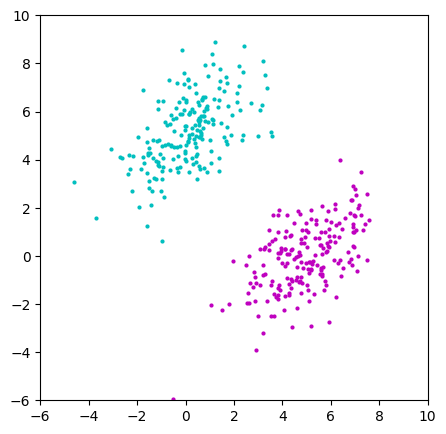

In [ ]:
NumDataPerClass = 200

m1 = [[0,5]]
m2 = [[5,0]]
c = [[2,1], [1,2]]

#Set up the data by generating isotropic Gaussians and rotating them accordingly

A = np.linalg.cholesky(c)

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4) #creates a scatter plot of the data points in X.
ax.scatter(X2[:,0], X2[:,1], c="m", s=4) #creates a scatter plot of the data points in Y.
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

In [ ]:
#concatenate data from two classes into one array
X = np.concatenate((X1, X2), axis=0)


In [ ]:
#setting up targets (labels) : set +1 and -1 as labels to indicate 2 classes
labelPos = np.ones(NumDataPerClass) #creates an array filled with ones; size of array = 200
labelNeg = -1.0 * np.ones(NumDataPerClass) #creates an array filled with -1.0s
y = np.concatenate((labelPos, labelNeg))
#print(y)

In [ ]:
#partioning the data into training and test sets
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex,] #selects rows from X based on the order defined in rIndex
yr = y[rIndex]
# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

(200, 2) (200,) (200, 2) (200,)


In [ ]:
def PercentCorrect(Inputs, targets, weights):
  N = len(targets)
  nCorrect = 0
  for n in range(N):
    OneInput = Inputs[n,:]
    if (targets[n] * np.dot(OneInput, weights) > 0):
      nCorrect +=1
  return 100*nCorrect/N

In [ ]:
#iterative error correcting learning
# Perceptron learning loop
#

# Random initialization of weights
#
w = np.random.randn(2)
print('Initial weights',w)

# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))

# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000 #modify until the percentage correct goes to 100

# Learning rate (change this to see convergence changing)
#
alpha = 0.002

# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

# Main Loop
#
for iter in range(MaxIter):
  # Select a data item at random
  #

  r = np.floor(np.random.rand()*Ntrain).astype(int)
  x = X_train[r,:]

  # If it is misclassified, update weights
  #
  if (y_train[r] * np.dot(x, w) < 0):
    w += alpha * y_train[r] * x

  # Evaluate trainign and test performances for plotting
  #
  P_train[iter] = PercentCorrect(X_train, y_train, w);
  P_test[iter] = PercentCorrect(X_test, y_test, w);

print('Weights after training', w)

print('Percentage Correct After Training: %6.2f %6.2f'
      %(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

Initial weights [1.1544821  0.14334805]
Initial Percentage Correct:  34.00
Weights after training [-0.11972044  0.19358391]
Percentage Correct After Training:  99.50 100.00


the estimated line after learning is -0.11972*X1 + 0.19358*X2 = 0. THis is a strainght line going through the origin with a positive gradient (X2 = (0.19358/0.11972)*X1 )

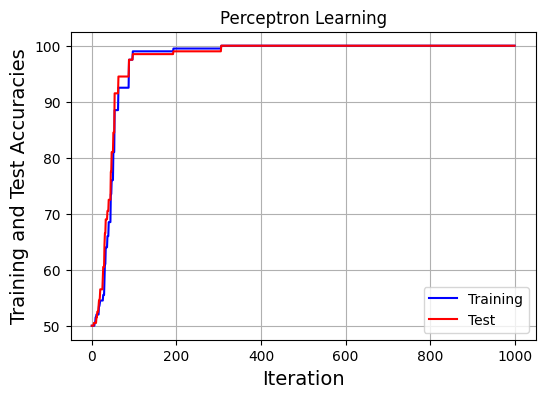

In [ ]:
#plot leaning curves
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test,'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')

Better way to implement iterative error correcting learn

In [ ]:
#iterative error correcting learning
# Perceptron learning loop
#

# Random initialization of weights
#
w = np.random.randn(2)
print(w)

# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))

# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000 #modify until the percentage correct goes to 100

# Learning rate (change this to see convergence changing)
#
alpha = 0.002

# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

percentage_error_test = PercentCorrect(X_test, y_test, w)

# Main Loop
#
iter = 0

while(percentage_error_test < 99.0 and iter< MaxIter):
  # Select a data item at random
  #

  r = np.floor(np.random.rand()*Ntrain).astype(int)
  x = X_train[r,:]

  # If it is misclassified, update weights
  #
  if (y_train[r] * np.dot(x, w) < 0):
    w += alpha * y_train[r] * x

  # Evaluate trainign and test performances for plotting
  #
  P_train[iter] = PercentCorrect(X_train, y_train, w);
  P_test[iter] = PercentCorrect(X_test, y_test, w);

  percentage_error_test = PercentCorrect(X_test, y_test, w)

  iter += 1

  #print(percentage_error_test)



print('Percentage Correct After Training: %6.2f %6.2f'
      %(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

[0.9819503  0.61742014]
Initial Percentage Correct:  44.00
Percentage Correct After Training:  98.50  99.50


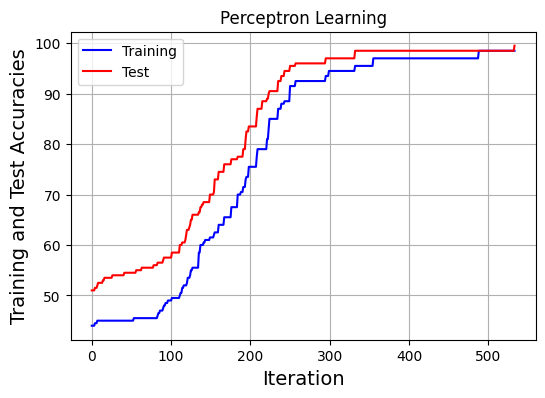

In [ ]:
#plot leaning curves
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(iter), P_train[:iter], 'b', label = "Training")
ax.plot(range(iter), P_test[:iter],'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')

**Sciket Learn Pckage**

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model = Perceptron()
model.fit(X_train, y_train)
yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" %(accuracy_score(yh_train, y_train)))

yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" %(accuracy_score(yh_test, y_test)))

if (accuracy_score(yh_test, y_test) > 0.99):
  print("Wow, Perfect Classification on Separable dataset!")

Accuracy on training set:   1.00
Accuracy on test set:   1.00
Wow, Perfect Classification on Separable dataset!


**Part 9**

(-6.0, 20.0)

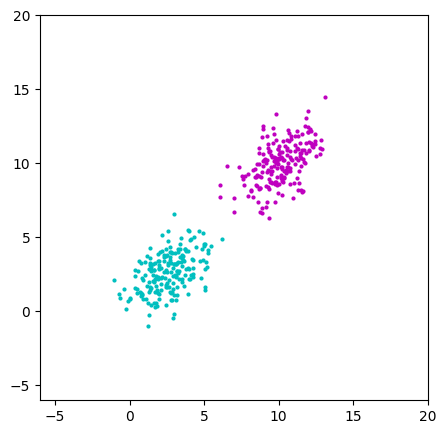

In [ ]:
NumDataPerClass = 200

m1 = [[2.5,2.5]]
m2 = [[10,10]]
c = [[2,1], [1,2]]

#Set up the data by generating isotropic Gaussians and rotating them accordingly

A = np.linalg.cholesky(c)

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4) #creates a scatter plot of the data points in X.
ax.scatter(X2[:,0], X2[:,1], c="m", s=4) #creates a scatter plot of the data points in Y.
ax.set_xlim(-6, 20)
ax.set_ylim(-6, 20)

The perception as implemented gives us a straight line goes through the origin. In the initial implementation we just change the gradient of that line in order to seperate the distributions. But in this case we can't seperate these two distributions with a straight line going through the origin. For that we need to add an offset to the line going through the origin. F0r that we need an additional weight term. Now in order to take the dot product between w^T and X we need an additional column in the X matrix.(because now the shape of w^t = 1 x 3, shape of X = 2 x 1 => Can't take the dot product) For that we can add a column of 1s. Now in the feature vector there are 3 values for each data point. Now we can take the dot product between w^T and X. (shape of w^t = 1 x 3, shape of X = 3 x 1 )

In [ ]:
#setting up targets (labels) : set +1 and -1 as labels to indicate 2 classes
labelPos = np.ones(NumDataPerClass) #creates an array filled with ones; size of array = 200
labelNeg = -1.0 * np.ones(NumDataPerClass) #creates an array filled with -1.0s
y = np.concatenate((labelPos, labelNeg))

In [ ]:
#concatenate data from two classes into one array
X = np.concatenate((X1, X2), axis=0) #stacking X1 and X2 on top of each other. shape of X1 = (200, 2), shape of X2 = (200, 2), shape of X = (400, 2),
#print(X)

# Create array of ones with shape (2*NumDataPerClass, 1)
O = np.ones((2*NumDataPerClass, 1))

# Append O to X
X = np.append(X, O, axis=1) #add a column to X. shape of X = (400, 2), new shape of X = (400, 3)
#print(X)

#partioning the data into training and test sets
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex,] #selects rows from X based on the order defined in rIndex
yr = y[rIndex]
# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

(200, 3) (200,) (200, 3) (200,)


In [ ]:
print(X)

[[ 3.14440972  0.80438406  1.        ]
 [ 3.97123694  2.19854906  1.        ]
 [ 2.56840313  4.72612522  1.        ]
 ...
 [ 7.32924675  9.73352512  1.        ]
 [ 8.88910975 11.79388731  1.        ]
 [ 9.39111852  6.28164089  1.        ]]


In [ ]:
#iterative error correcting learning
# Perceptron learning loop
#

# Random initialization of weights
#
w = np.random.randn(3)
print(w)

# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))

# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=10000

# Learning rate (change this to see convergence changing)
#
alpha = 0.002

# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

percentage_error_test = PercentCorrect(X_test, y_test, w)

# Main Loop
#
iter = 0

while(percentage_error_test < 99.0 and iter< MaxIter):
  # Select a data item at random
  #

  r = np.floor(np.random.rand()*Ntrain).astype(int)
  x = X_train[r,:]

  # If it is misclassified, update weights
  #
  if (y_train[r] * np.dot(x, w) < 0):
    w += alpha * y_train[r] * x

  # Evaluate trainign and test performances for plotting
  #
  P_train[iter] = PercentCorrect(X_train, y_train, w);
  P_test[iter] = PercentCorrect(X_test, y_test, w);

  percentage_error_test = PercentCorrect(X_test, y_test, w)

  iter += 1

  #print(percentage_error_test)



print('Percentage Correct After Training: %6.2f %6.2f'
      %(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

[-2.08617541  0.53176885 -1.4180029 ]
Initial Percentage Correct:  51.50
Percentage Correct After Training: 100.00  99.50


In [ ]:
print('weights after training = ',w)

weights after training =  [-0.04300495  0.00160976  0.2419971 ]


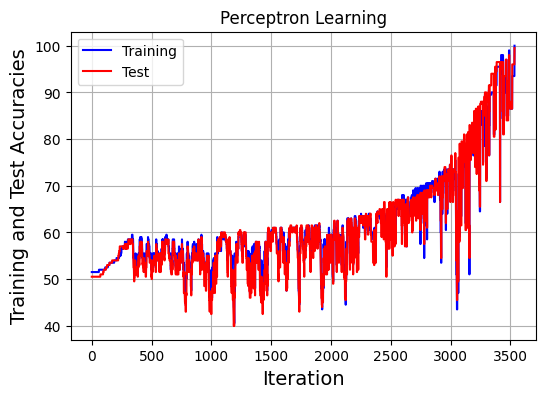

In [ ]:
#plot leaning curves
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(iter), P_train[:iter], 'b', label = "Training")
ax.plot(range(iter), P_test[:iter],'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')

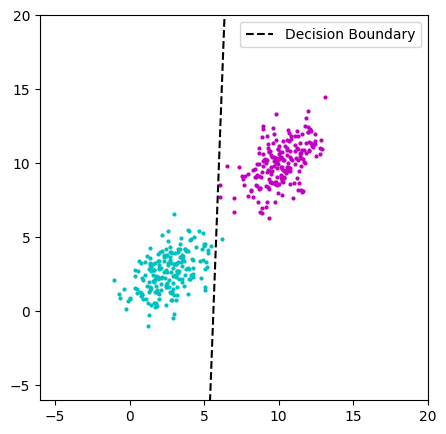

In [ ]:
# Define the line equation
def line_eq(w, x):
    return (-w[0] * x - w[2]) / w[1]

# Plotting
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X1[:, 0], X1[:, 1], c="c", s=4)
ax.scatter(X2[:, 0], X2[:, 1], c="m", s=4)
ax.set_xlim(-6, 20)
ax.set_ylim(-6, 20)

# Plot the line determined by w
x_vals = np.linspace(-6, 20, 100)
y_vals = line_eq(w, x_vals)
ax.plot(x_vals, y_vals, '--k', label='Decision Boundary')

plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load the CSV file into a DataFrame
data = pd.read_csv('/content/thyroid.csv')

# Assuming the first column is the target column (y) and rest are features (X)
X = data.iloc[:, 1:]  # Features, excluding the first column
y = data.iloc[:, 0]   # Target, only the first column

# Add a column of 1s for the bias term to X
X['bias'] = 1  # Add a new column 'bias' filled with 1s

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (171, 6)
y_train shape: (171,)
X_test shape: (43, 6)
y_test shape: (43,)


In [ ]:
print(X_train)
print(X_test)

In [ ]:
# Assign values for Ntrain and Ntest
Ntrain = X_train.shape[0]  # Number of rows in X_train
Ntest = X_test.shape[0]    # Number of rows in X_test

In [ ]:
#iterative error correcting learning
# Perceptron learning loop
#

# Random initialization of weights
#
w = np.random.randn(6)
print(w)

# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))

# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=10000

# Learning rate (change this to see convergence changing)
#
alpha = 0.002

# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

percentage_error_test = PercentCorrect(X_test, y_test, w)

# Main Loop
#
iter = 0

while(percentage_error_test < 99.0 and iter< MaxIter):
  # Select a data item at random
  #

  r = np.floor(np.random.rand()*Ntrain).astype(int)
  x = X_train[r,:]

  # If it is misclassified, update weights
  #
  if (y_train[r] * np.dot(x, w) < 0):
    w += alpha * y_train[r] * x

  # Evaluate trainign and test performances for plotting
  #
  P_train[iter] = PercentCorrect(X_train, y_train, w);
  P_test[iter] = PercentCorrect(X_test, y_test, w);

  percentage_error_test = PercentCorrect(X_test, y_test, w)

  iter += 1

  #print(percentage_error_test)



print('Percentage Correct After Training: %6.2f %6.2f'
      %(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

[-0.275394   -1.1635345  -0.42173089 -1.73192144  1.63402032 -3.3865213 ]
Initial Percentage Correct:   1.17
Percentage Correct After Training: 100.00 100.00


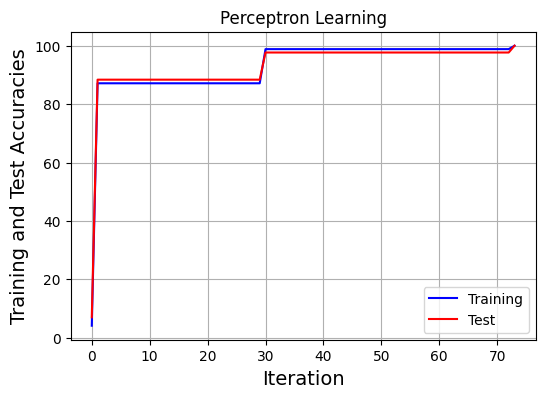

In [ ]:
#plot leaning curves
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(iter), P_train[:iter], 'b', label = "Training")
ax.plot(range(iter), P_test[:iter],'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')